In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
# some of the entries in the school holiday column is written as a where as the  entry should be boolean form only 
sales_data = pd.read_csv("Salesdata.csv", low_memory=False)
store_data = pd.read_csv("store.csv")

In [4]:
merged_data = pd.merge(sales_data, store_data, on='Store', how='left')

In [5]:
merged_data.shape

(1017209, 18)

In [6]:
print(merged_data.isnull().sum())

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64


In [7]:
merged_data['Date'] = pd.to_datetime(merged_data['Date'], dayfirst=True)
merged_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


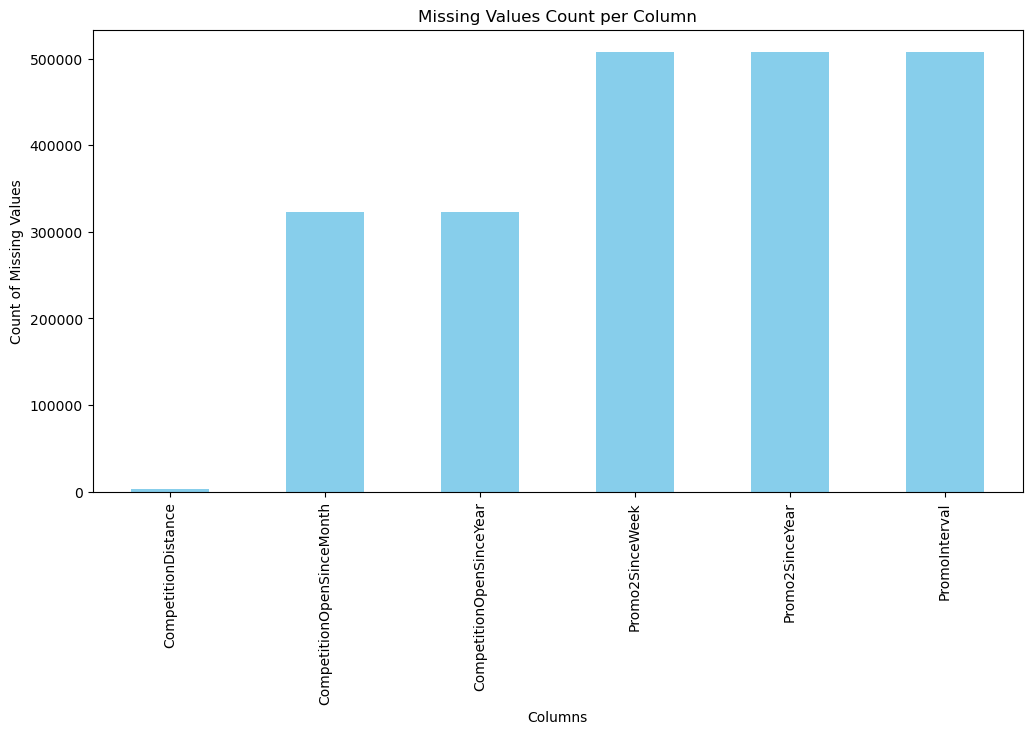

In [11]:
missing_values = merged_data.isnull().sum()
missing_values = missing_values[missing_values > 0]

plt.figure(figsize=(12, 6))
missing_values.plot(kind='bar', color='skyblue')
plt.title('Missing Values Count per Column')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.show()


In [7]:
# Drop columns with significant missing values
columns_to_drop = ['Promo2SinceWeek' , 'Promo2SinceYear', 'PromoInterval']
merged_data.drop(columns=columns_to_drop, inplace=True)

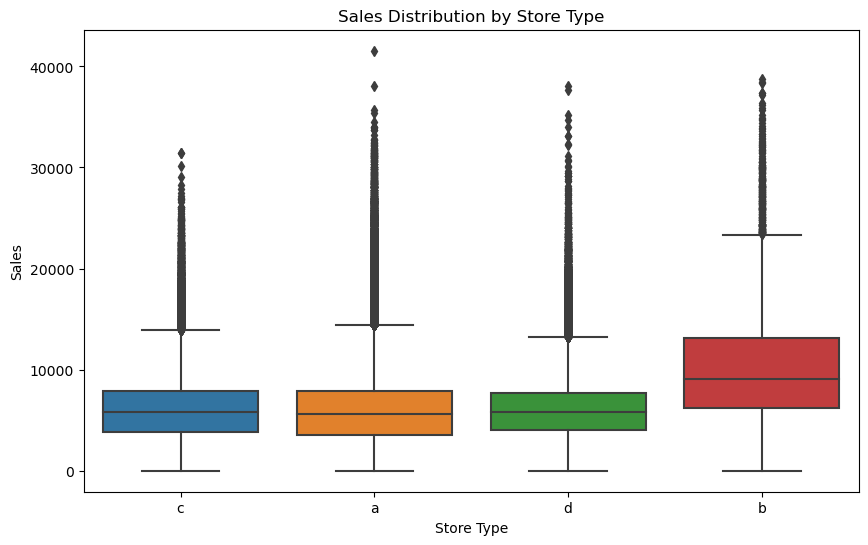

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='StoreType', y='Sales', data=merged_data)
plt.title('Sales Distribution by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.show()

In [8]:
merged_data.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0


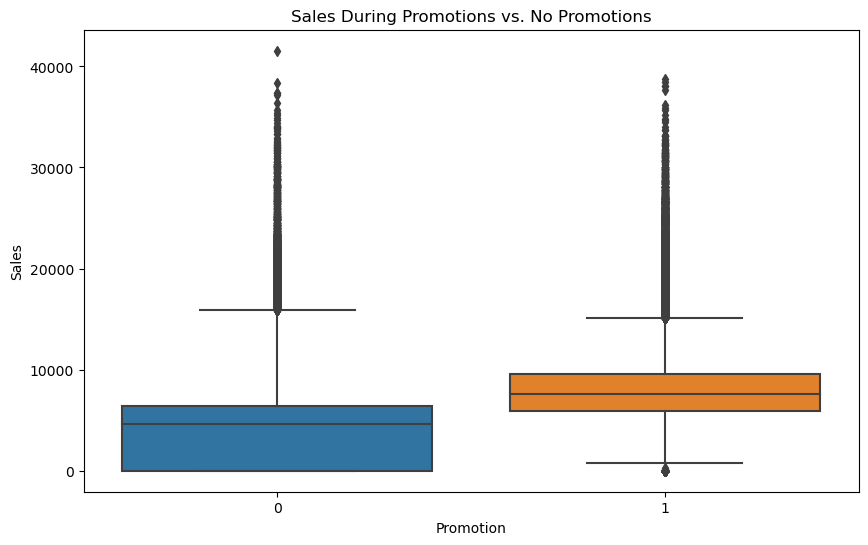

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Promo', y='Sales', data=merged_data)
plt.title('Sales During Promotions vs. No Promotions')
plt.xlabel('Promotion')
plt.ylabel('Sales')
plt.show()

In [9]:
merged_data['CompetitionDistance'].fillna(merged_data['CompetitionDistance'].median(), inplace=True)
merged_data['CompetitionOpenSinceMonth'].fillna(0, inplace=True)
merged_data['CompetitionOpenSinceYear'].fillna(0, inplace=True)

In [10]:
merged_data.dtypes
df = pd.DataFrame(merged_data)
sales_column = df['Sales']
# Calculate the range
min_sales = sales_column.min()
max_sales = sales_column.max()
print(f"Minimum Sales: {min_sales}")
print(f"Maximum Sales: {max_sales}")


Minimum Sales: 0
Maximum Sales: 41551


In [11]:
merged_data['Year'] = merged_data['Date'].dt.year
merged_data['Month'] = merged_data['Date'].dt.month
merged_data['Day'] = merged_data['Date'].dt.day
merged_data['Weekday'] = merged_data['Date'].dt.weekday

In [12]:
merged_data.skew()

C:\Users\USER\AppData\Local\Temp\ipykernel_1580\509530782.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_data.skew()


Store                       -0.000955
DayOfWeek                    0.001593
Sales                        0.641460
Customers                    1.598650
Open                        -1.758045
Promo                        0.487838
SchoolHoliday                1.677842
CompetitionDistance          2.933466
CompetitionOpenSinceMonth    0.189174
CompetitionOpenSinceYear    -0.782138
Promo2                      -0.002255
Year                         0.300265
Month                        0.274202
Day                          0.008454
Weekday                      0.001593
dtype: float64

In [13]:
# Calculate the number of months competition has been open
merged_data['CompetitionOpenSince'] = (
    12 * (merged_data['Year'] - merged_data['CompetitionOpenSinceYear']) +
    (merged_data['Month'] - merged_data['CompetitionOpenSinceMonth'])
).apply(lambda x: max(x, 0))

In [14]:
merged_data.fillna(0, inplace=True)

In [15]:
categorical_cols = ['StateHoliday', 'StoreType', 'Assortment']
merged_data = pd.get_dummies(merged_data, columns=categorical_cols, drop_first=True)

In [16]:
X = merged_data.drop(columns=['Sales', 'Date'])
y = merged_data['Sales']

In [17]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
print(f"Training feature set shape: {X_train.shape}")
print(f"Test feature set shape: {X_test.shape}")
print(f"Training target set shape: {y_train.shape}")
print(f"Test target set shape: {y_test.shape}")

Training feature set shape: (813767, 23)
Test feature set shape: (203442, 23)
Training target set shape: (813767,)
Test target set shape: (203442,)


In [19]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [20]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [21]:
merged_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,Weekday,CompetitionOpenSince,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,1,5,2015-07-31,5263,555,1,1,1,1270.0,9.0,...,4,82.0,0,0,0,0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,1,570.0,11.0,...,4,92.0,0,0,0,0,0,0,0,0
2,3,5,2015-07-31,8314,821,1,1,1,14130.0,12.0,...,4,103.0,0,0,0,0,0,0,0,0
3,4,5,2015-07-31,13995,1498,1,1,1,620.0,9.0,...,4,70.0,0,0,0,0,1,0,0,1
4,5,5,2015-07-31,4822,559,1,1,1,29910.0,4.0,...,4,3.0,0,0,0,0,0,0,0,0


In [22]:
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
print("Test set predictions:")
print(test_results.head())


Test set predictions:
        Actual  Predicted
76435        0       0.00
923026    5548    5653.09
731180    7467    7662.48
790350    3360    3527.57
252134   11414    9662.21


In [23]:
#Convert the predictions to a DataFrame
all_test_predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})

# Print the entire DataFrame
print(all_test_predictions)

        Actual  Predicted
76435        0       0.00
923026    5548    5653.09
731180    7467    7662.48
790350    3360    3527.57
252134   11414    9662.21
...        ...        ...
574924    8822    8120.21
752038   11716   12052.56
38978     3375    3104.89
193217       0       0.00
260336   15388   14790.57

[203442 rows x 2 columns]


In [24]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

In [25]:
print(f"RMSE on training set: {rmse_train}")
print(f"RMSE on test set: {rmse_test}")
print(f"MAE on test set: {mae_test}")
print(f"R-squared on test set: {r2_test}")

RMSE on training set: 163.86239348683634
RMSE on test set: 444.4046594711482
MAE on test set: 264.9962106153105
R-squared on test set: 0.986645599880892


In [26]:
lags = [1, 2, 3, 7, 14, 30]
for lag in lags:
    merged_data[f'Sales_lag_{lag}'] = merged_data.groupby('Store')['Sales'].shift(lag)

# Step 2: Create Rolling Window Features
windows = [3, 7, 14, 30]
for window in windows:
    merged_data[f'Sales_roll_mean_{window}'] = merged_data.groupby('Store')['Sales'].transform(lambda x: x.rolling(window).mean())
    merged_data[f'Sales_roll_std_{window}'] = merged_data.groupby('Store')['Sales'].transform(lambda x: x.rolling(window).std())


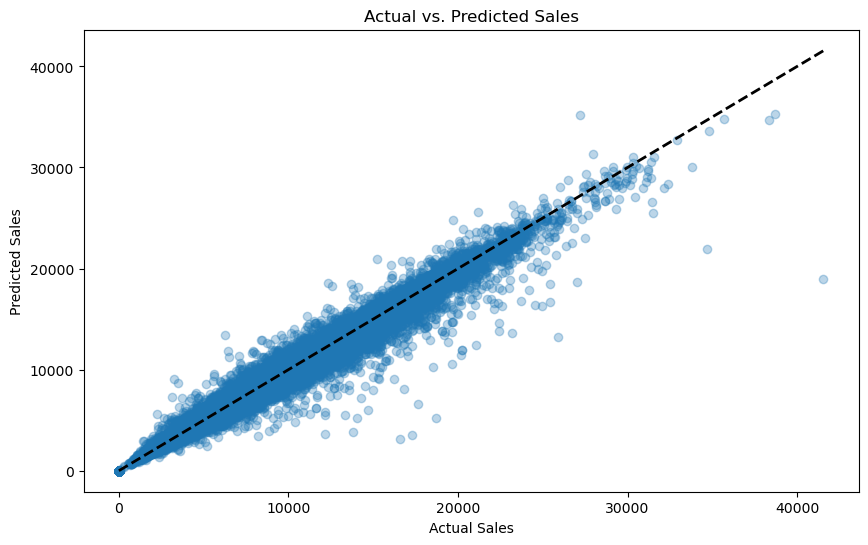

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.3)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()


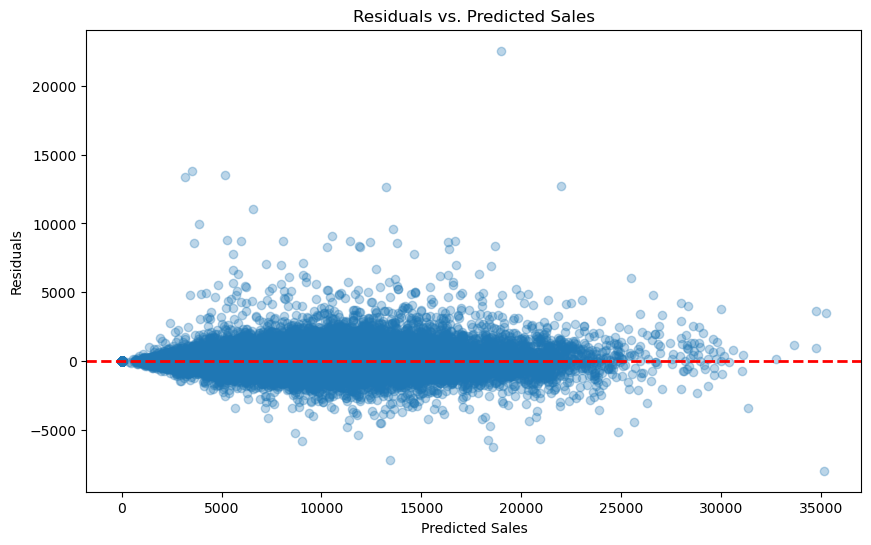

In [28]:
residuals = y_test - y_pred_test

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals, alpha=0.3)
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Sales')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.show()